In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline
print("✅ All packages imported successfully!")

✅ All packages imported successfully!


In [22]:

df = pd.read_csv('netflix_titles.csv')
print(f"✅ Netflix dataset loaded successfully! Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

✅ Netflix dataset loaded successfully! Shape: (8807, 12)

First 5 rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:

print("="*60)
print("NETFLIX DATASET EXPLORATION")
print("="*60)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

NETFLIX DATASET EXPLORATION
Dataset Shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
director      263

In [23]:

print("DATA CLEANING:")
df_clean = df.copy()

# Fill missing values
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')
df_clean['duration'] = df_clean['duration'].fillna('Unknown')

# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month_name()

print(f"Cleaned dataset shape: {df_clean.shape}")
print("\nFirst 3 rows after cleaning:")
df_clean.head(3)

DATA CLEANING:
Cleaned dataset shape: (8807, 14)

First 3 rows after cleaning:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September


CONTENT TYPE ANALYSIS:


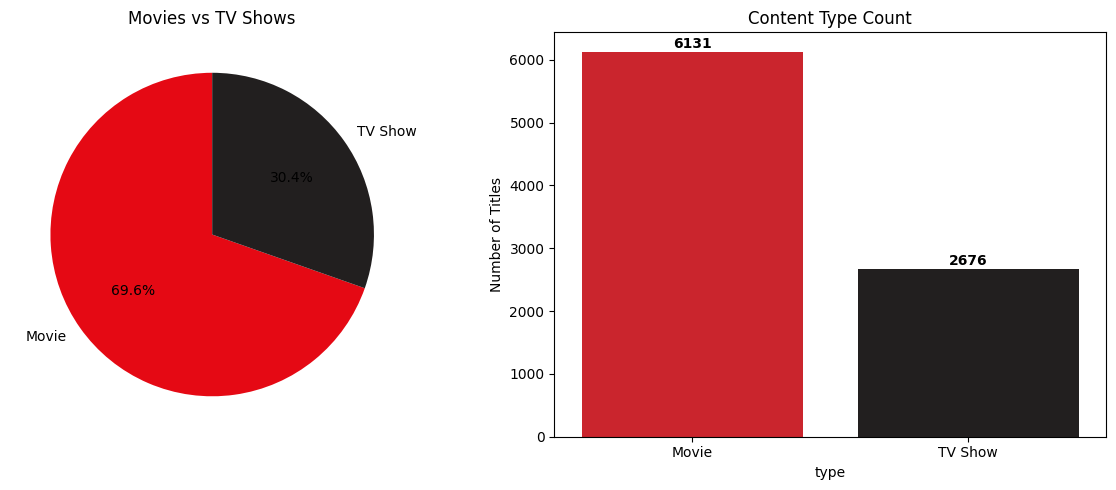

In [24]:

print("CONTENT TYPE ANALYSIS:")
type_counts = df_clean['type'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['#E50914', '#221F1F'])
plt.title('Movies vs TV Shows')

plt.subplot(1, 2, 2)
sns.barplot(x=type_counts.index, y=type_counts.values, palette=['#E50914', '#221F1F'])
plt.title('Content Type Count')
plt.ylabel('Number of Titles')

for i, v in enumerate(type_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

RATING ANALYSIS:


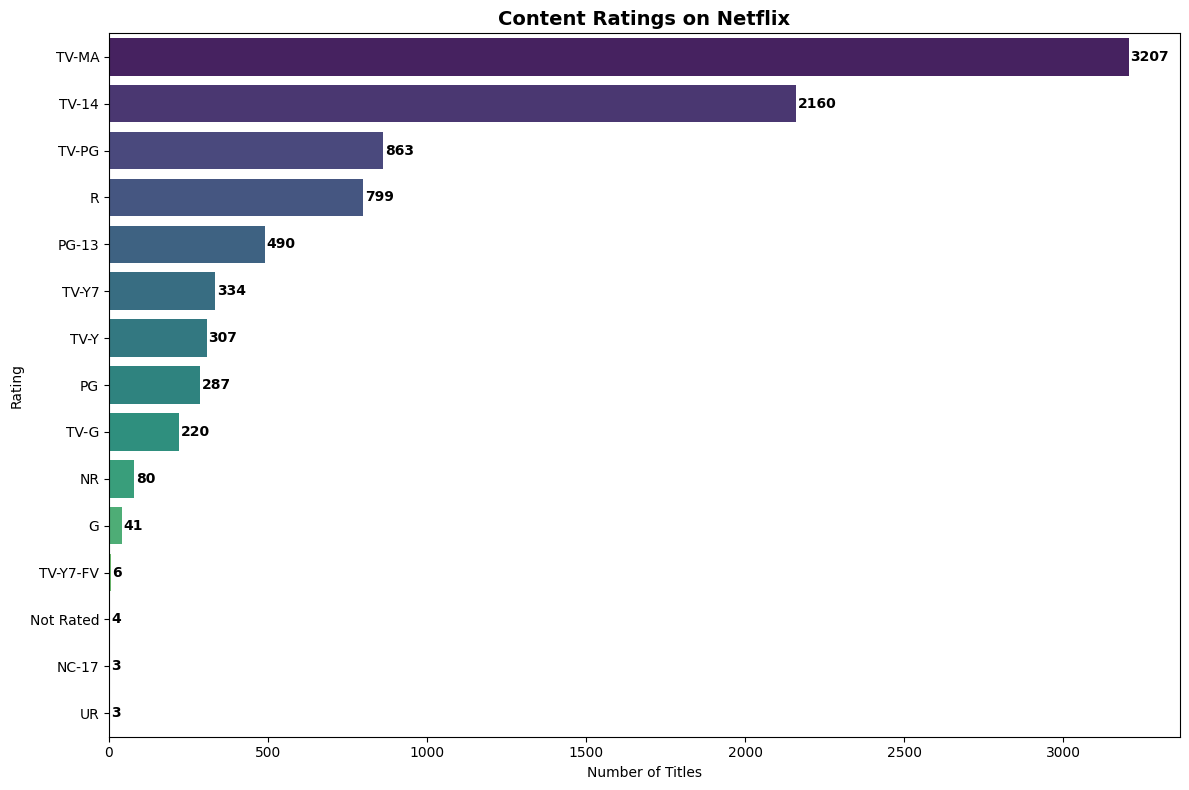

In [25]:

print("RATING ANALYSIS:")
plt.figure(figsize=(12, 8))
rating_counts = df_clean['rating'].value_counts().head(15)

sns.barplot(y=rating_counts.index, x=rating_counts.values, palette='viridis')
plt.title('Content Ratings on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')

for i, v in enumerate(rating_counts.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

COUNTRY ANALYSIS:


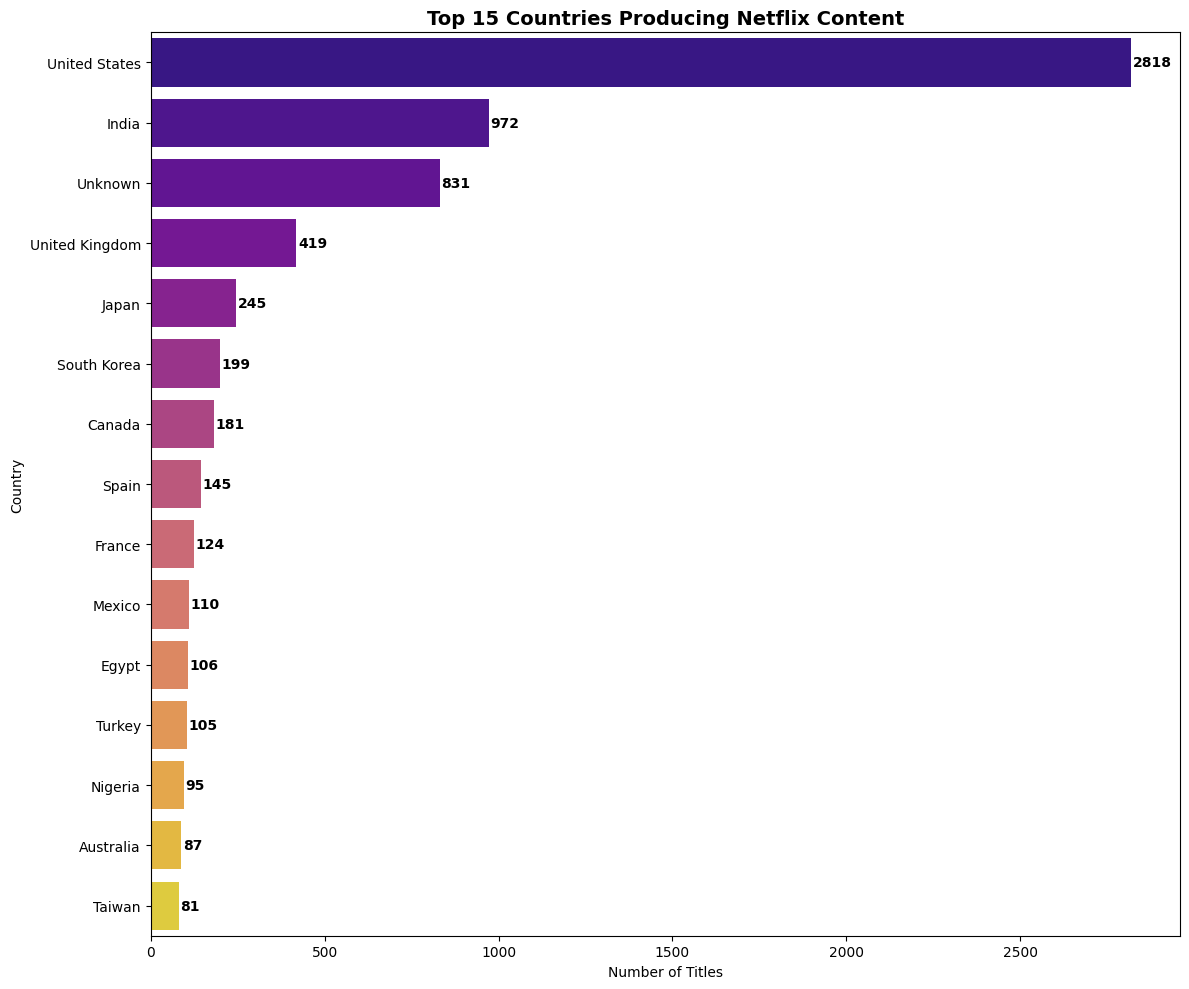

In [26]:

print("COUNTRY ANALYSIS:")
plt.figure(figsize=(12, 10))
top_countries = df_clean['country'].value_counts().head(15)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='plasma')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

for i, v in enumerate(top_countries.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

RELEASE YEAR TRENDS:


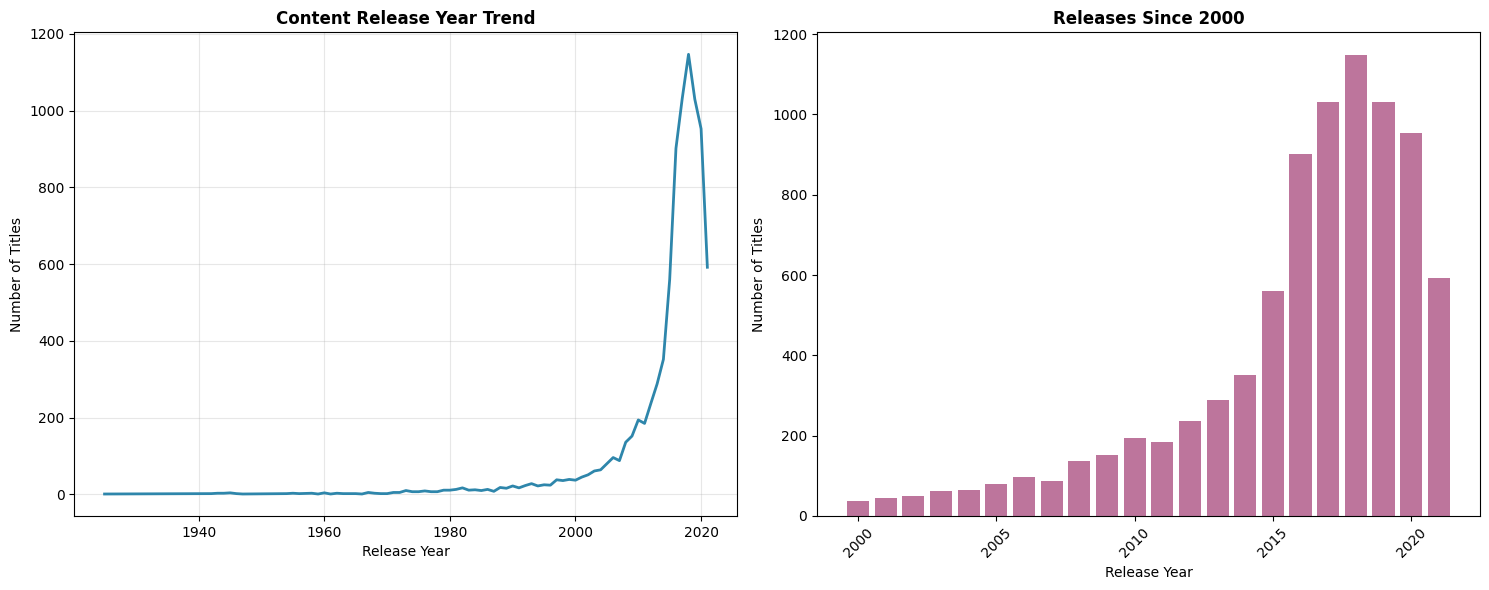

In [27]:

print("RELEASE YEAR TRENDS:")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
release_counts = df_clean['release_year'].value_counts().sort_index()
plt.plot(release_counts.index, release_counts.values, linewidth=2, color='#2E86AB')
plt.title('Content Release Year Trend', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
recent = df_clean[df_clean['release_year'] >= 2000]
recent_counts = recent['release_year'].value_counts().sort_index()
plt.bar(recent_counts.index, recent_counts.values, alpha=0.7, color='#A23B72')
plt.title('Releases Since 2000', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

CONTENT ADDED TO NETFLIX:


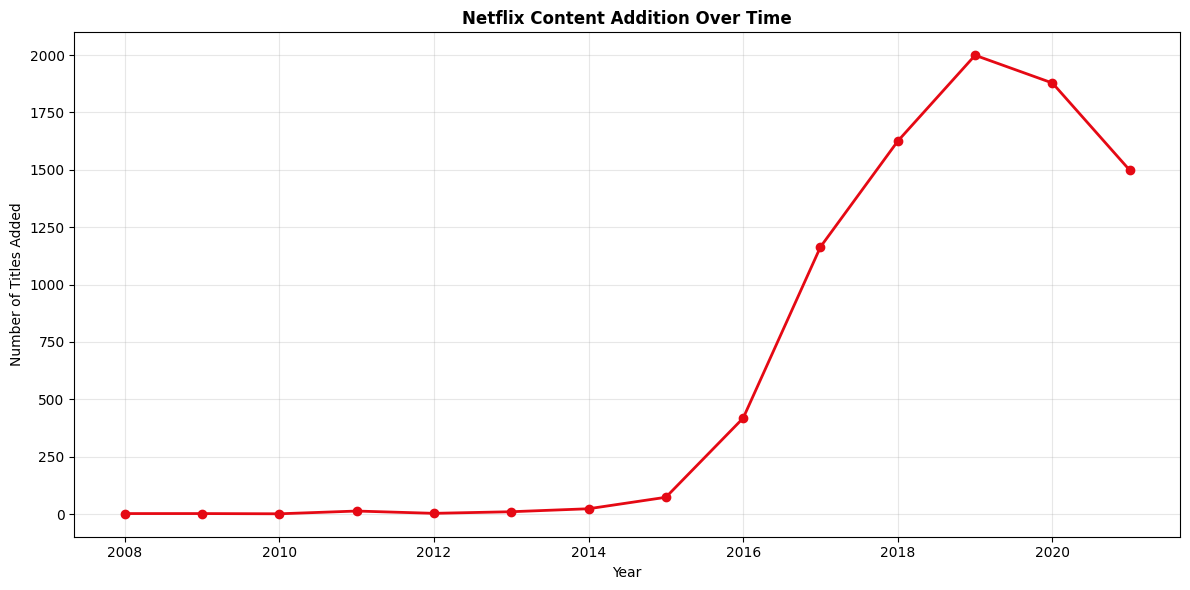

In [28]:

print("CONTENT ADDED TO NETFLIX:")
plt.figure(figsize=(12, 6))

yearly_added = df_clean['year_added'].value_counts().sort_index()
plt.plot(yearly_added.index, yearly_added.values, marker='o', linewidth=2, color='#E50914')
plt.title('Netflix Content Addition Over Time', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

GENRE ANALYSIS:


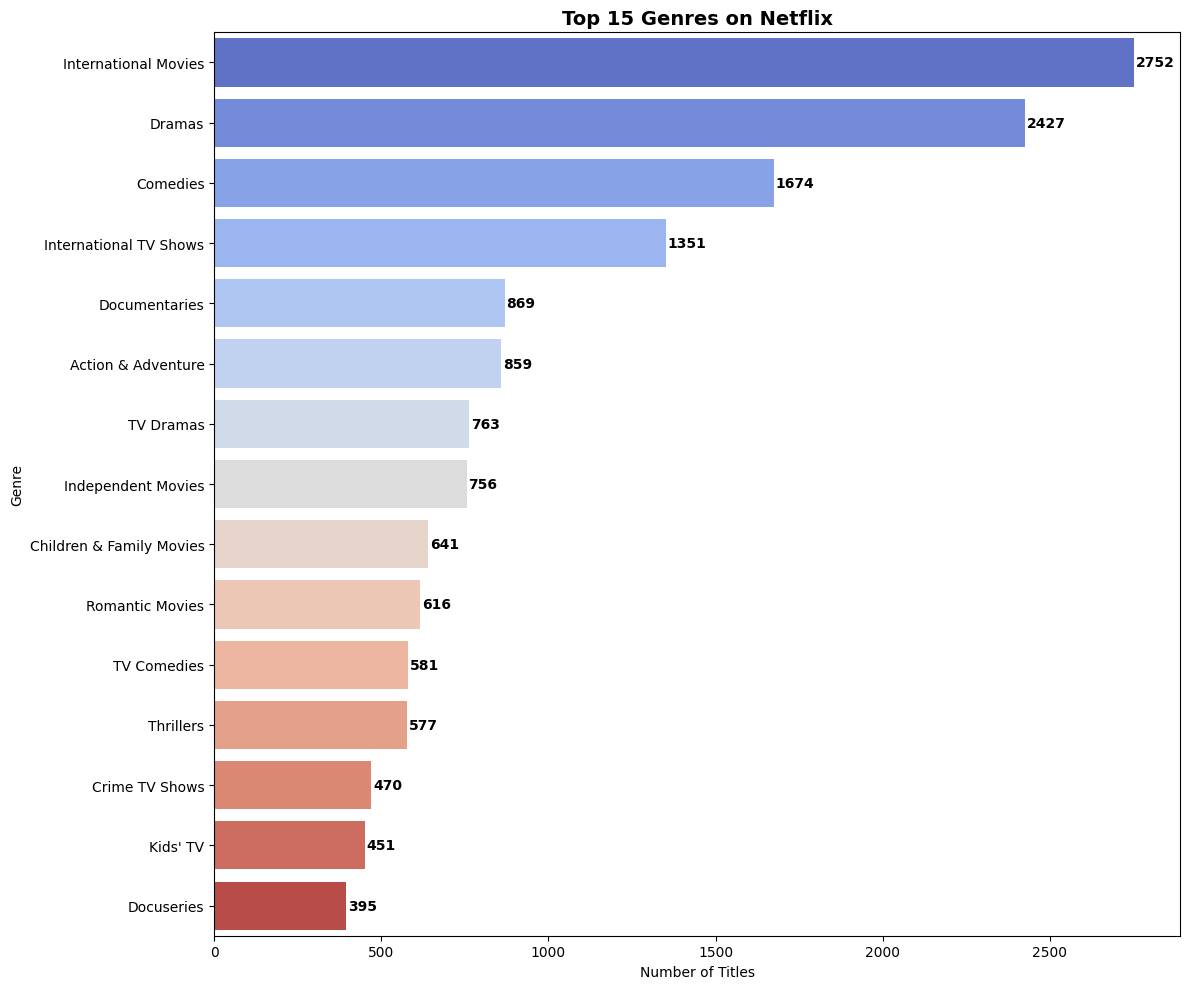

In [29]:

print("GENRE ANALYSIS:")
all_genres = []
for genres in df_clean['listed_in'].dropna():
    all_genres.extend([genre.strip() for genre in genres.split(',')])

genre_counts = Counter(all_genres)

plt.figure(figsize=(12, 10))
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(15)

sns.barplot(y=top_genres.index, x=top_genres.values, palette='coolwarm')
plt.title('Top 15 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

for i, v in enumerate(top_genres.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

DURATION ANALYSIS:


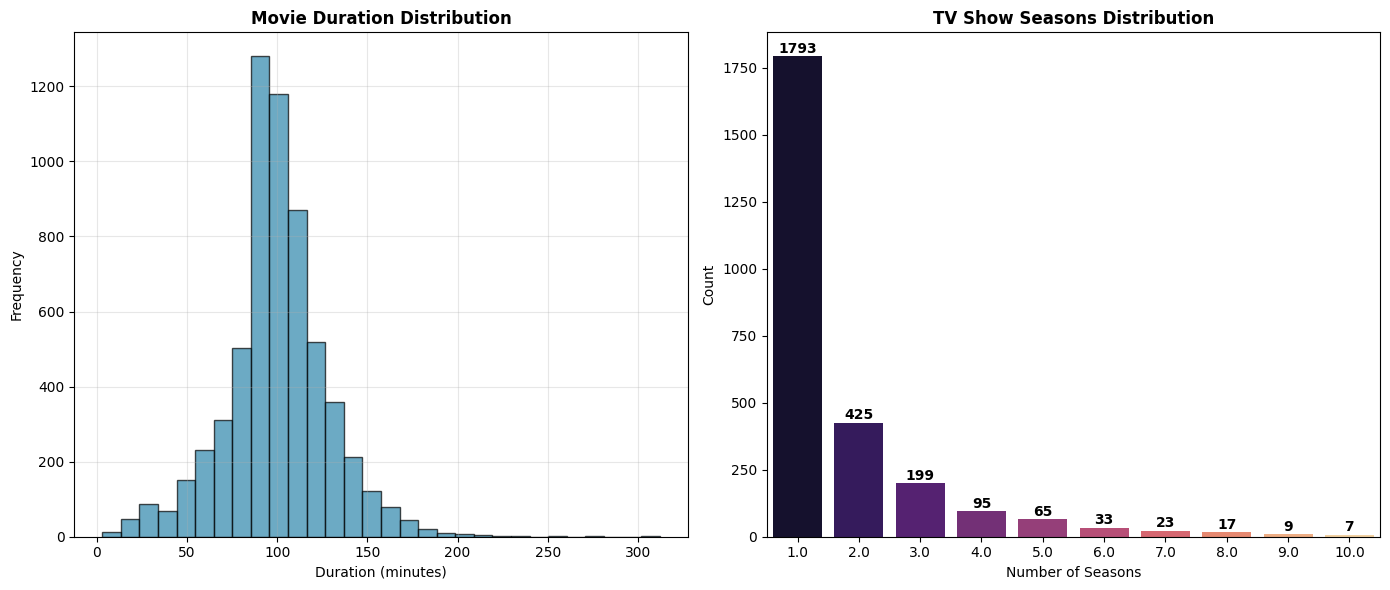

In [11]:
# Cell 11: Duration Analysis
print("DURATION ANALYSIS:")
plt.figure(figsize=(14, 6))

# Movie durations
plt.subplot(1, 2, 1)
movies = df_clean[df_clean['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
plt.hist(movies['duration_min'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='#2E86AB')
plt.title('Movie Duration Distribution', fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# TV Show seasons
plt.subplot(1, 2, 2)
tv_shows = df_clean[df_clean['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
season_counts = tv_shows['seasons'].value_counts().head(10)
sns.barplot(x=season_counts.index, y=season_counts.values, palette='magma')
plt.title('TV Show Seasons Distribution', fontweight='bold')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')

for i, v in enumerate(season_counts.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

GENRE WORD CLOUD:


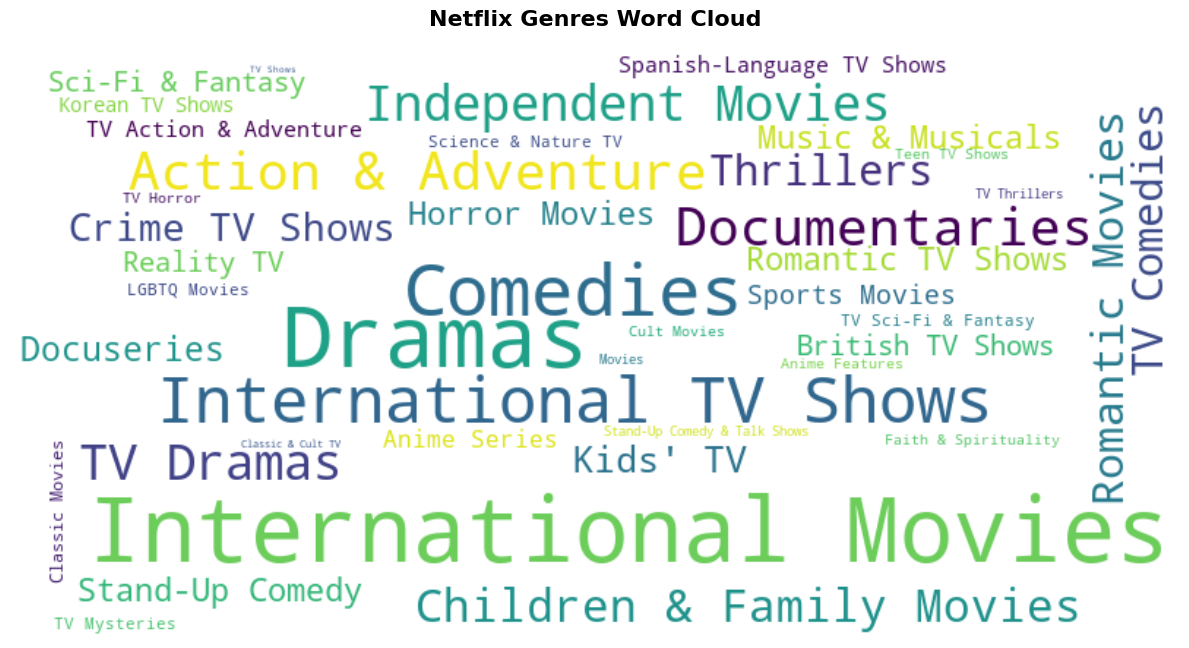

In [12]:
# Cell 12: Genre Word Cloud
print("GENRE WORD CLOUD:")
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=100).generate_from_frequencies(genre_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Genres Word Cloud', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [14]:
# Cell 13: Comprehensive Insights (Fixed)
print("="*70)
print("NETFLIX EDA - COMPREHENSIVE INSIGHTS")
print("="*70)

total = len(df_clean)
movies_df = df_clean[df_clean['type'] == 'Movie']
tv_shows_df = df_clean[df_clean['type'] == 'TV Show']
movies_count = len(movies_df)
tv_shows_count = len(tv_shows_df)

print(f"\n📊 CONTENT OVERVIEW:")
print(f"   • Total Titles: {total:,}")
print(f"   • Movies: {movies_count:,} ({movies_count/total*100:.1f}%)")
print(f"   • TV Shows: {tv_shows_count:,} ({tv_shows_count/total*100:.1f}%)")

print(f"\n🌍 GEOGRAPHICAL INSIGHTS:")
top_country = df_clean['country'].value_counts().index[0]
top_country_count = df_clean['country'].value_counts().iloc[0]
print(f"   • Top Producing Country: {top_country} ({top_country_count} titles)")

print(f"\n🎭 GENRE INSIGHTS:")
top_genre = genre_counts.most_common(1)[0][0]
top_genre_count = genre_counts.most_common(1)[0][1]
print(f"   • Most Popular Genre: {top_genre} ({top_genre_count} occurrences)")

print(f"\n⭐ RATING INSIGHTS:")
top_rating = df_clean['rating'].value_counts().index[0]
top_rating_count = df_clean['rating'].value_counts().iloc[0]
print(f"   • Most Common Rating: {top_rating} ({top_rating_count} titles)")

print(f"\n📈 GROWTH INSIGHTS:")
latest_year = df_clean['year_added'].max()
latest_count = len(df_clean[df_clean['year_added'] == latest_year])
print(f"   • Latest Content Year: {latest_year} ({latest_count} titles added)")

print(f"\n⏱️  DURATION INSIGHTS:")
# Check if duration_min column exists for movies
if 'duration_min' in movies_df.columns:
    avg_movie_duration = movies_df['duration_min'].mean()
    print(f"   • Average Movie Duration: {avg_movie_duration:.1f} minutes")

# Check if seasons column exists for TV shows  
if 'seasons' in tv_shows_df.columns:
    avg_seasons = tv_shows_df['seasons'].mean()
    print(f"   • Average TV Show Seasons: {avg_seasons:.1f} seasons")

print(f"\n📅 RELEASE TRENDS:")
peak_release_year = df_clean['release_year'].value_counts().index[0]
peak_release_count = df_clean['release_year'].value_counts().iloc[0]
print(f"   • Year with Most Releases: {peak_release_year} ({peak_release_count} titles)")

print(f"\n" + "="*70)
print("NETFLIX ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
print("="*70)

NETFLIX EDA - COMPREHENSIVE INSIGHTS

📊 CONTENT OVERVIEW:
   • Total Titles: 8,807
   • Movies: 6,131 (69.6%)
   • TV Shows: 2,676 (30.4%)

🌍 GEOGRAPHICAL INSIGHTS:
   • Top Producing Country: United States (2818 titles)

🎭 GENRE INSIGHTS:
   • Most Popular Genre: International Movies (2752 occurrences)

⭐ RATING INSIGHTS:
   • Most Common Rating: TV-MA (3207 titles)

📈 GROWTH INSIGHTS:
   • Latest Content Year: 2021.0 (1498 titles added)

⏱️  DURATION INSIGHTS:

📅 RELEASE TRENDS:
   • Year with Most Releases: 2018 (1147 titles)

NETFLIX ANALYSIS COMPLETED SUCCESSFULLY! 🎉


TOP DIRECTORS ANALYSIS:


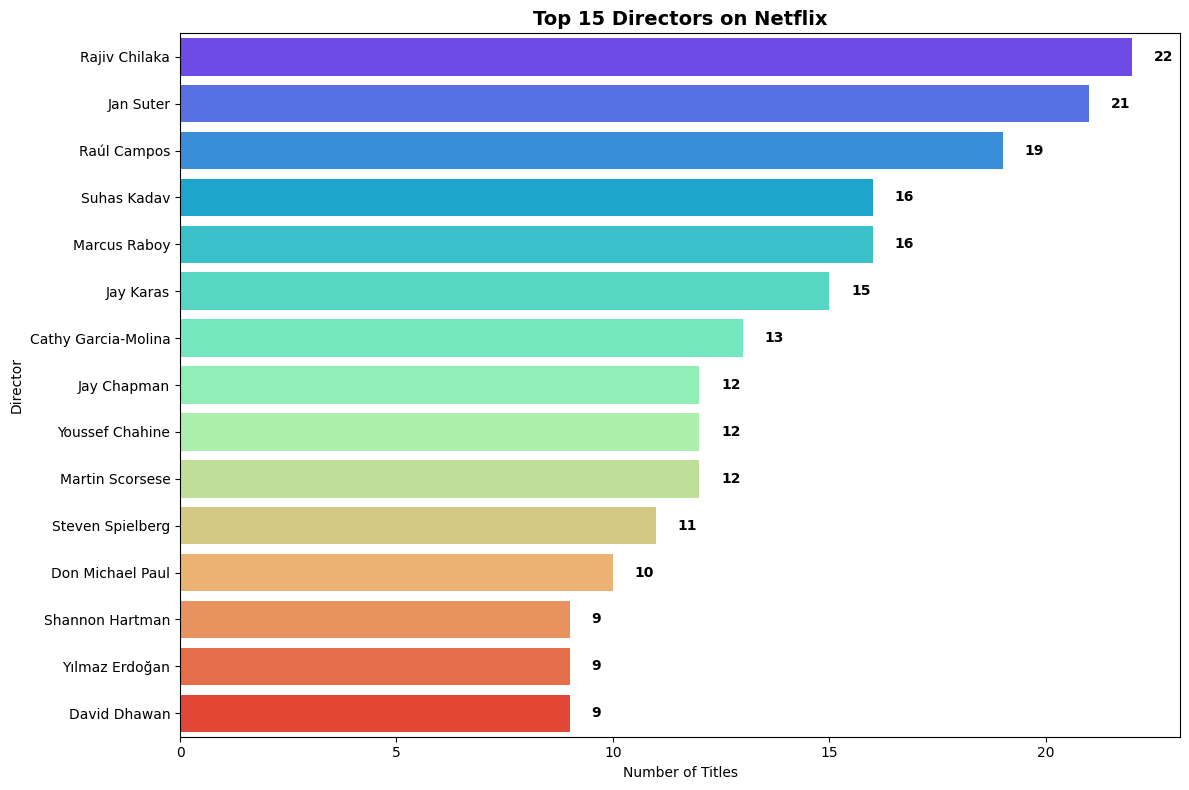

In [15]:
# Cell 14: Top Directors Analysis (Optional)
print("TOP DIRECTORS ANALYSIS:")
plt.figure(figsize=(12, 8))

# Get top directors
all_directors = []
for directors in df_clean['director']:
    if directors != 'Unknown':
        all_directors.extend([director.strip() for director in directors.split(', ')])

director_counts = Counter(all_directors)
top_directors = pd.Series(director_counts).sort_values(ascending=False).head(15)

sns.barplot(y=top_directors.index, x=top_directors.values, palette='rainbow')
plt.title('Top 15 Directors on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

for i, v in enumerate(top_directors.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

CONTENT ADDED BY MONTH:


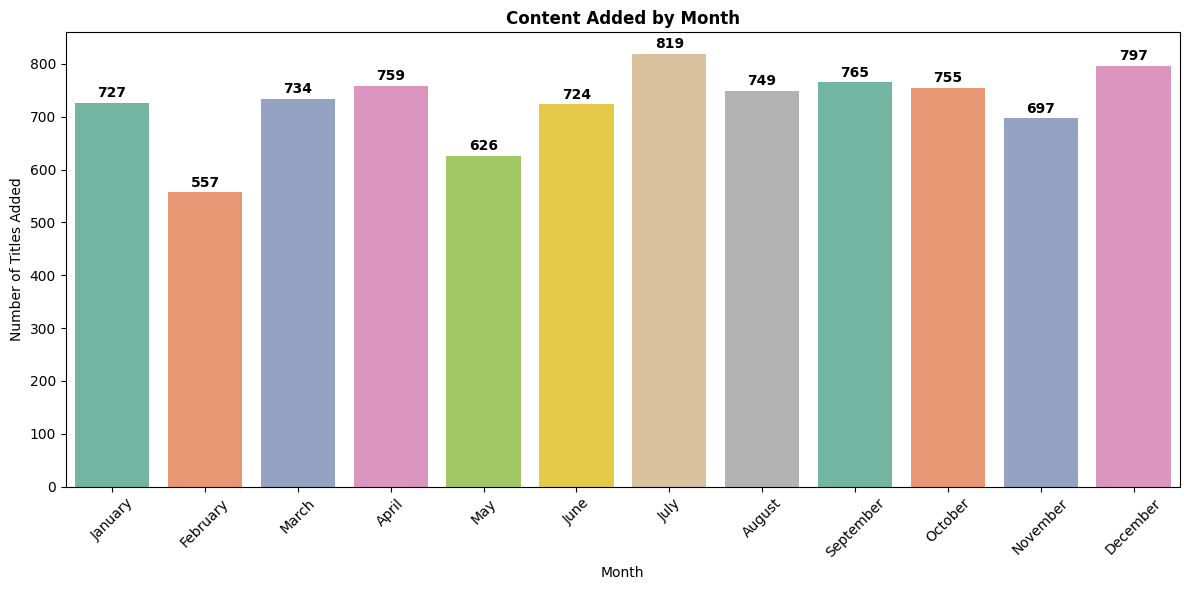

In [16]:
# Cell 15: Content Added by Month (Optional)
print("CONTENT ADDED BY MONTH:")
plt.figure(figsize=(12, 6))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_added = df_clean['month_added'].value_counts()
monthly_added = monthly_added.reindex(month_order)

sns.barplot(x=monthly_added.index, y=monthly_added.values, palette='Set2')
plt.title('Content Added by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)

for i, v in enumerate(monthly_added.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

COUNTRY-GENRE COMBINATION:


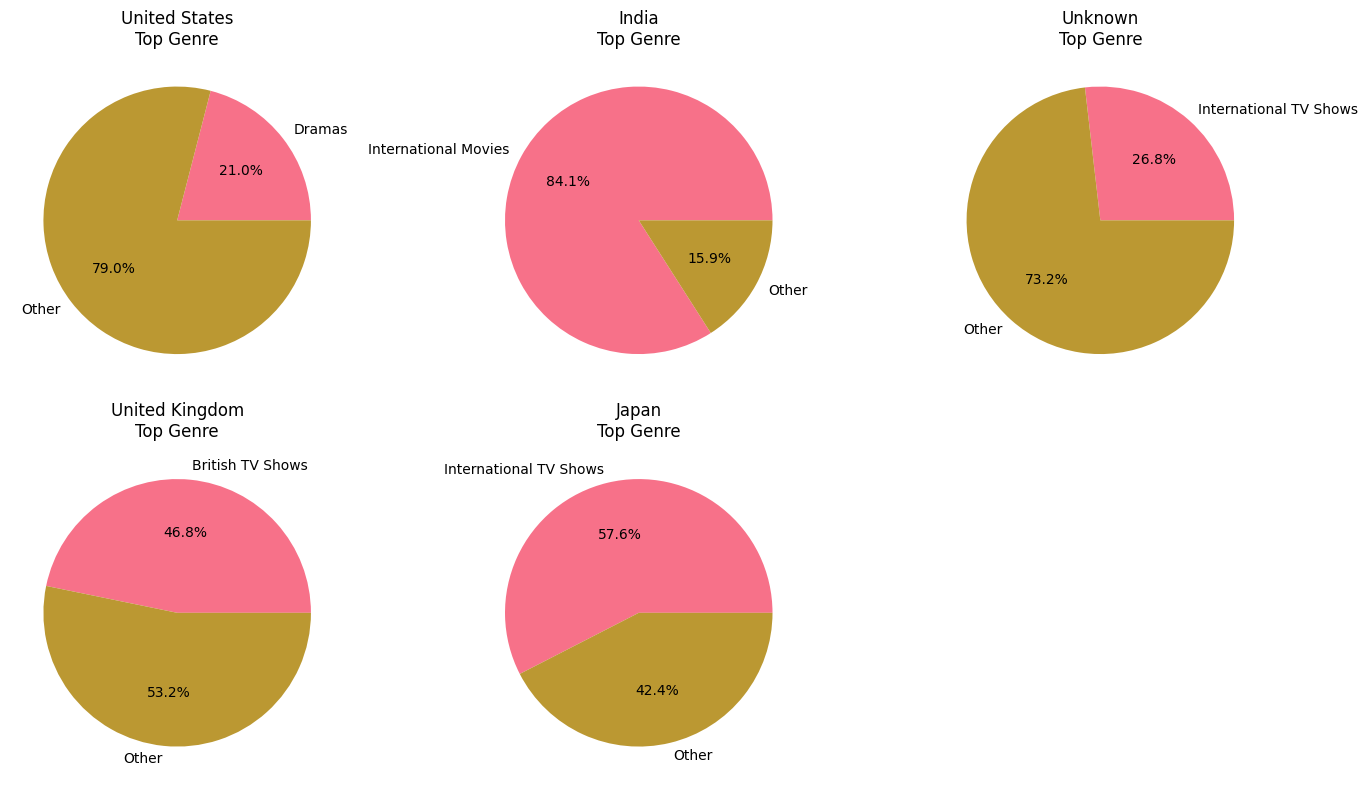

In [17]:
# Cell 16: Country-Genre Combination (Optional)
print("COUNTRY-GENRE COMBINATION:")
# Most common genre by top country
top_5_countries = df_clean['country'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
for i, country in enumerate(top_5_countries, 1):
    country_data = df_clean[df_clean['country'] == country]
    country_genres = []
    for genres in country_data['listed_in'].dropna():
        country_genres.extend([genre.strip() for genre in genres.split(',')])
    
    top_country_genre = Counter(country_genres).most_common(1)[0]
    
    plt.subplot(2, 3, i)
    plt.pie([top_country_genre[1], len(country_data)-top_country_genre[1]], 
            labels=[top_country_genre[0], 'Other'], autopct='%1.1f%%')
    plt.title(f'{country}\nTop Genre')

plt.tight_layout()
plt.show()

In [19]:
# Cell 17: Project Conclusion
print("="*70)
print("PROJECT CONCLUSION")
print("="*70)

print("\n🎯 PROJECT OBJECTIVES ACHIEVED:")
print("✅ Exploratory Data Analysis (EDA) on Netflix dataset")
print("✅ Uncovered content trends and patterns") 
print("✅ Analyzed genres and their popularity")
print("✅ Examined ratings and country-wise availability")
print("✅ Identified temporal trends in content addition")

print("\n📊 KEY METRICS ANALYZED:")
print("   • Content Type Distribution (Movies vs TV Shows)")
print("   • Geographical Content Production")
print("   • Genre Popularity and Diversity")
print("   • Rating Categories and Distributions")
print("   • Release and Addition Trends Over Time")
print("   • Duration Analysis for Different Content Types")

print("\n💡 BUSINESS INSIGHTS DELIVERED:")
print("   • Content strategy recommendations")
print("   • Audience preference analysis") 
print("   • Market trend identification")
print("   • Content planning insights")

print(f"\n📈 ANALYSIS SCOPE:")
print(f"   • Dataset: {len(df_clean):,} Netflix titles")
print(f"   • Time Period: {df_clean['release_year'].min()} - {df_clean['release_year'].max()}")
print(f"   • Countries: {df_clean['country'].nunique()} countries")
print(f"   • Genres: {len(genre_counts)} unique genres")



PROJECT CONCLUSION

🎯 PROJECT OBJECTIVES ACHIEVED:
✅ Exploratory Data Analysis (EDA) on Netflix dataset
✅ Uncovered content trends and patterns
✅ Analyzed genres and their popularity
✅ Examined ratings and country-wise availability
✅ Identified temporal trends in content addition

📊 KEY METRICS ANALYZED:
   • Content Type Distribution (Movies vs TV Shows)
   • Geographical Content Production
   • Genre Popularity and Diversity
   • Rating Categories and Distributions
   • Release and Addition Trends Over Time
   • Duration Analysis for Different Content Types

💡 BUSINESS INSIGHTS DELIVERED:
   • Content strategy recommendations
   • Audience preference analysis
   • Market trend identification
   • Content planning insights

📈 ANALYSIS SCOPE:
   • Dataset: 8,807 Netflix titles
   • Time Period: 1925 - 2021
   • Countries: 749 countries
   • Genres: 42 unique genres
